In [165]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import scipy as sp
from scipy import integrate

In [ ]:
# Punto 1.2

In [166]:
def f(x,n):
    f = 2*(-1)**(n-1)*np.sin(x*n)/n
    return f

In [273]:
L = 2*np.pi
cicles = 1
x = np.linspace(-np.pi, L*cicles-np.pi,1000)

In [274]:
n = 1
nt = 50
F = 0

<IPython.core.display.Javascript object>


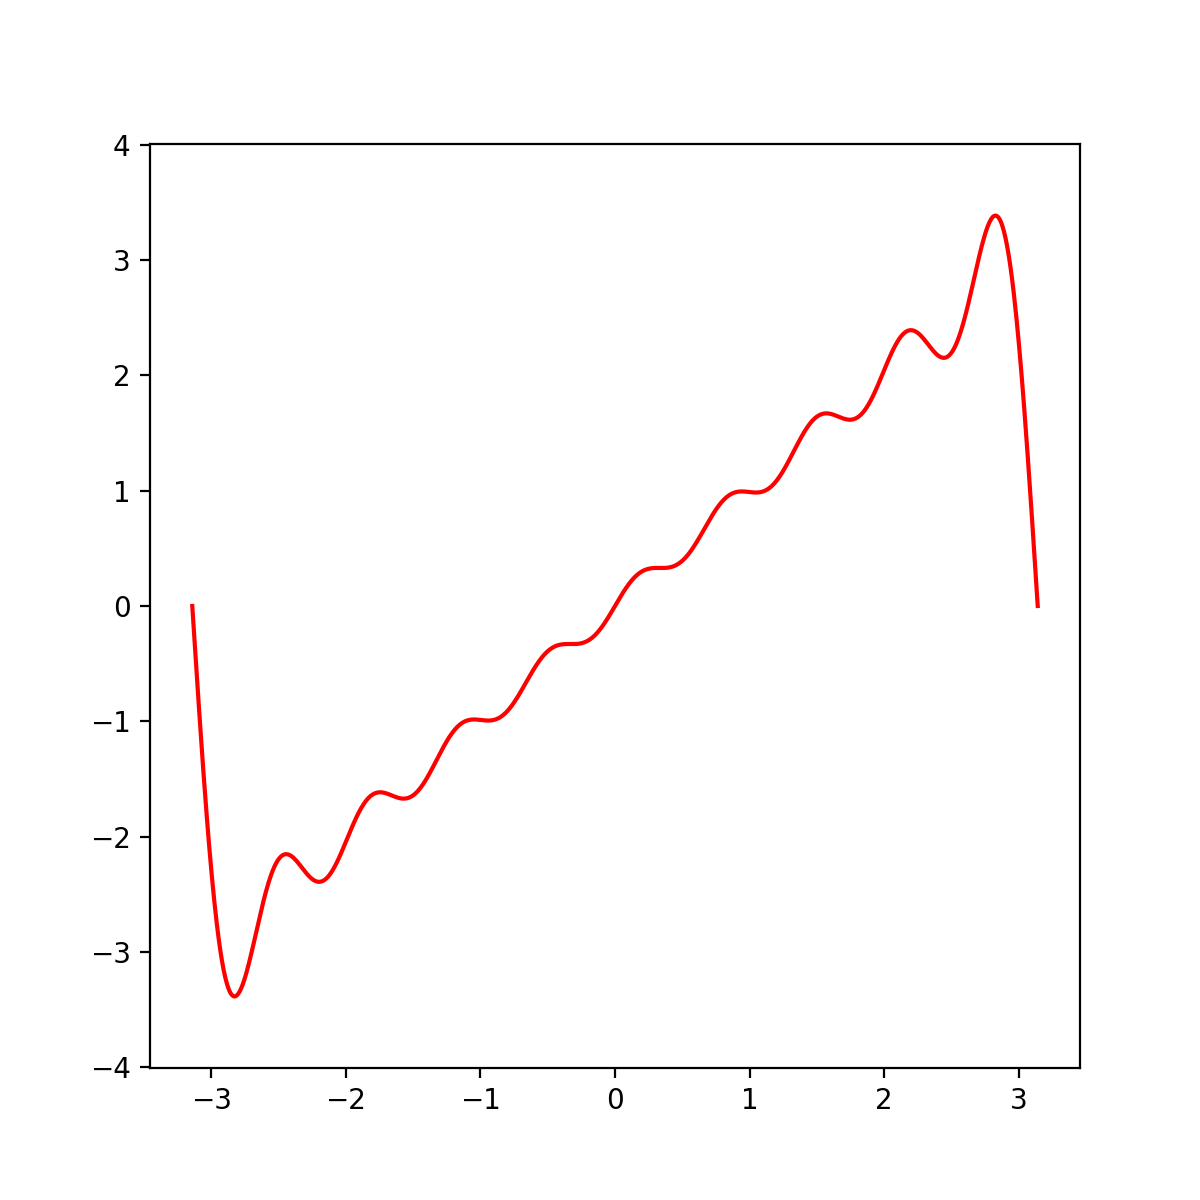

In [275]:
fig = plt.figure(figsize=(6,6))
camera = Camera(fig)

In [276]:
while n < nt:
    F += f(x,n)
    plt.plot(x,F,c='r')
    camera.snap()
    n += 1 

In [277]:
animation = camera.animate()
animation.save('Fourier.mp4')

In [172]:
# Punto 1.4: Derivada espectral

In [201]:
def f_(x):
    return np.e**(-0.1*x)*np.sin(x)

In [202]:
def f_prima(x):
    return np.e**(-0.1*x)*np.cos(x)- 0.1*np.e**(-0.1*x)*np.sin(x)

In [203]:
def f_derecha(f, t, h):
    d = 0
    if h != 0:
        d = (f(t+h) - f(t))/h
    return d

In [278]:
L = 2*np.pi
n = 100
dx = 100/(4*np.pi) # Paso de derivación (Aquí tengo dudas de la forma en la que está puesta,
#ya que por unidades, tendría más sentido que fuera 4pi/100. Asimismo, se relacionaria de manera natural con
#n y L, ya que tendría la relación dx = 2L/n, que tiene, para mí, sentido de forma intuitiva. Sin embargo, 
#se deja como está definido en el enunciado) 
#dx = 2*L/n

x = np.linspace(-L, L, n) # Puntos en los que se evalúa

In [279]:
analitica = f_prima(x)
derecha = f_derecha(f_, x, dx)

In [280]:
# Derivada espectral
trans = np.fft.fft(f_(x))

frecuencias = np.pi/L * np.arange(-n/2, n/2) # Para poder tener un buen resultado, no usé la función vista en clase.
#Por su parte, obtuve de manera 'manual' las frecuencias, las cuales deben ir entre -50 y 50 (como lo hacíamos antes)

frecuencias = np.fft.fftshift(frecuencias)  #Este es el paso más importante, y es para poder ordenar las frecuencias 
#obtenidas de forma que estén alineadas con los valores de la fft. Es decir, K1*fft_1, K2*fft_2 y así, ya que es una
#multiplicación de vectores. Lo que hace esta linea es pasar la frecuencia 0 al centro, para cumplir lo anteriormente mencionado.

espectral = np.fft.ifft(1j*frecuencias*trans) # Definición vista en clase
espectral = np.real(espectral)

<IPython.core.display.Javascript object>


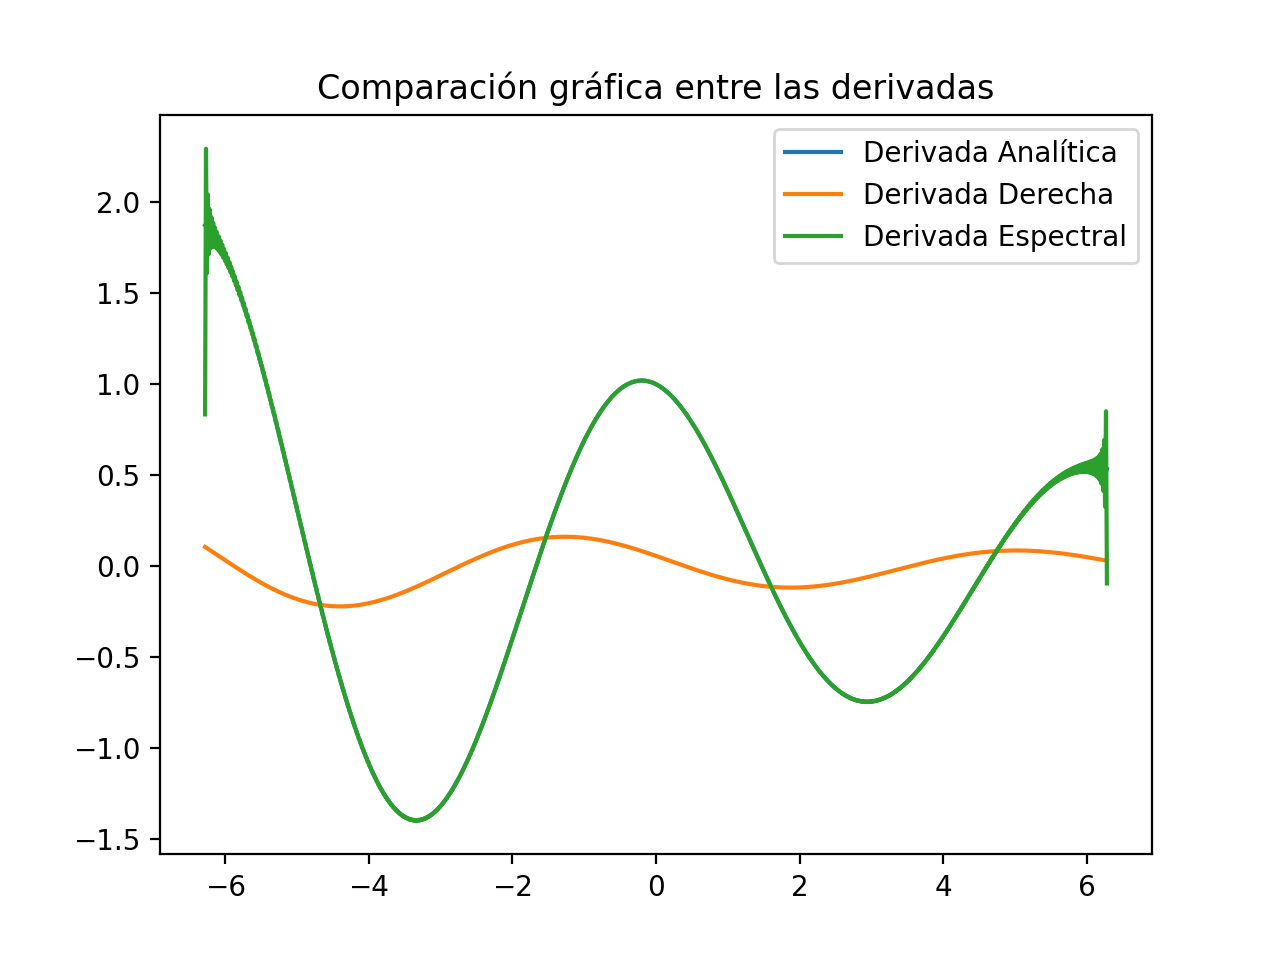

In [281]:
#Graficación

plt.figure()
plt.plot(x, analitica, label='Derivada Analítica')
plt.plot(x, derecha, label='Derivada Derecha')
plt.plot(x, espectral, label='Derivada Espectral')
plt.title('Comparación gráfica entre las derivadas')
plt.legend()